In [1]:
import keras
from keras.datasets import fashion_mnist 
from keras.layers import Dense, Activation, Flatten, Conv2D, MaxPooling2D
from keras.models import Sequential
from keras.utils import to_categorical
import numpy as np
import matplotlib.pyplot as plt

In [2]:
(train_X,train_Y), (test_X,test_Y) = fashion_mnist.load_data()

4422102/4422102 [==============================] - 0s 0us/step


In [3]:
train_X = train_X.reshape(-1, 28,28, 1)
test_X = test_X.reshape(-1, 28,28, 1)

'''
When using a convolutional layer as the first layer to our model,
 we need to reshape our data to (n_images, x_shape, y_shape, channels).
  All you really need to know is that you should set channels to 1 for grayscale images
   and set channels to 3 when you have a set of RGB-images as input.
'''

'\nWhen using a convolutional layer as the first layer to our model,\n we need to reshape our data to (n_images, x_shape, y_shape, channels).\n  All you really need to know is that you should set channels to 1 for grayscale images\n   and set channels to 3 when you have a set of RGB-images as input.\n'

In [4]:
train_X.shape

(60000, 28, 28, 1)

In [5]:
train_X = train_X.astype('float32')
test_X = test_X.astype('float32')
train_X = train_X / 255
test_X = test_X / 255

In [6]:
train_Y_one_hot = to_categorical(train_Y)
test_Y_one_hot = to_categorical(test_Y)

In [7]:
model = Sequential()
model.add(Conv2D(64, (3,3), input_shape=(28, 28, 1)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(64, (3,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(64))
model.add(Dense(10))
model.add(Activation('softmax'))
model.compile(loss=keras.losses.categorical_crossentropy, optimizer=keras.optimizers.Adam(),metrics=['accuracy'])

In [8]:
model.fit(train_X, train_Y_one_hot, batch_size=64, epochs=4)

Epoch 1/4
938/938 [==============================] - 61s 64ms/step - loss: 0.4652 - accuracy: 0.8313
Epoch 2/4
938/938 [==============================] - 50s 54ms/step - loss: 0.3146 - accuracy: 0.8863
Epoch 3/4
938/938 [==============================] - 49s 53ms/step - loss: 0.2735 - accuracy: 0.9002
Epoch 4/4
938/938 [==============================] - 49s 52ms/step - loss: 0.2446 - accuracy: 0.9110


In [9]:
test_loss, test_acc = model.evaluate(test_X, test_Y_one_hot)
print('Test loss', test_loss)
print('Test accuracy', test_acc)

313/313 [==============================] - 3s 8ms/step - loss: 0.2717 - accuracy: 0.9002
Test loss 0.27171728014945984
Test accuracy 0.9002000093460083


In [10]:
predictions = model.predict(test_X)
print(np.argmax(np.round(predictions[0])))

313/313 [==============================] - 2s 8ms/step
9


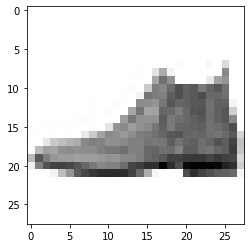

In [11]:
plt.imshow(test_X[0].reshape(28, 28), cmap = plt.cm.binary)
plt.show()